<a href="https://colab.research.google.com/github/naushy786/123/blob/master/Uber_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UBER SUPPLY DEMAND GAP

### ABSTRACT

> **Objective**: Identify the root cause of the Supply-Demand problem at Airport-City travels for Uber.<br>
Recommend ways to improve the situation.


> **Problem Statement**:Uber is an online cab rental service provider.Uber is facing driver cancellation and non-availability of cars issue for commutation from or to the airport leading impact on the business and loss of potential revenue.<br>


> **Approach**:

*   Identify the most pressing problems for Uber.
*   Identify the gap between supply and demand of requests
*   Identify the reason for the supply-demand gap and recommend some ways to resolve them.










**Variables used in dataset**

*   Request id: A unique identifier of the request
*  Time of request: The date and time at which the customer made the trip request
*  Drop-off time: The drop-off date and time, in case the trip was completed 
*  Pick-up point: The point from which the request was made
*  Driver id: The unique identification number of the driver
*  Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available




In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [0]:
from google.colab import files               # Uploading the dataset
uploaded = files.upload()

Saving Uber Request Data.csv to Uber Request Data.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Uber Request Data.csv']))


In [0]:
df.shape                                    #Checking the dimension of dataset

(6745, 6)

In [0]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Data Cleaning

As we can see that the Request and Drop timestamp are not in proper format.So we need to convert them in proper format

In [0]:
df['Request timestamp']=df['Request timestamp'].map(pd.to_datetime)            #Changing datetime format to proper format
df['Drop timestamp']=df['Drop timestamp'].map(pd.to_datetime)

In [0]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [0]:
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,2016-11-07 19:02:00,2016-12-07 21:04:00
freq,NaN,3507,NaN,2831,6,4
first,NaN,NaN,NaN,NaN,2016-07-13 00:00:24,2016-07-13 00:01:12
last,NaN,NaN,NaN,NaN,2016-12-07 23:54:00,2016-12-07 23:45:00
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN


### We can see that there is no need of Request id and Driver id so we can drop these two columns.

In [0]:
df.drop('Driver id', axis=1, inplace=True)                       # Removing Driver and Request id
df.drop('Request id', axis=1, inplace=True)

In [0]:
df.head()

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### Creating new columns

In [0]:
df['Request date'] = [d.date() for d in df['Request timestamp']]                                            #Separating date
df['Request time'] = [d.time() for d in df['Request timestamp']]                                            #Separating time
df['Request hour'] = df['Request timestamp'].dt.hour                                                        #Creating request hour
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format = '%d/%m/%Y %H:%M:%S')

df['Day of Week'] = df['Request timestamp'].dt.weekday_name                                                  # Getting weekday name from request timestamp
df['Request_timestamp']=df['Request timestamp']
df=df.assign(session=pd.cut(df.Request_timestamp.dt.hour,[0,3,6,12,16,21,24],labels=['Late Night','Early Morning','Morning','Afternoon','Evening','Night']))



In [0]:
df.head()

,Pickup point,Status,Request timestamp,Drop timestamp,Request date,Request time,Request hour,Day of Week,Request_timestamp,session
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,Monday,2016-11-07 11:51:00,Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,Monday,2016-11-07 17:57:00,Evening
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,Wednesday,2016-12-07 09:17:00,Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,Wednesday,2016-12-07 21:08:00,Evening
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,Wednesday,2016-07-13 08:33:16,Morning


### Check null values

In [0]:
df.isnull().sum()

Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

There are null values in drop timestamp because of non availability or cancellation of cabs.

## The Problem

In [0]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [0]:
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

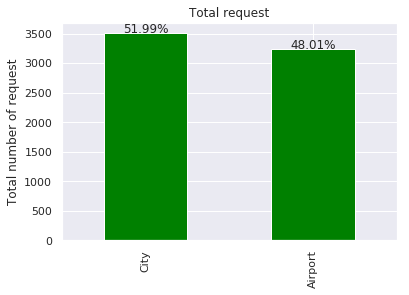

In [0]:
sns.set(style="darkgrid")
plt.title('Total request')
plt.ylabel('Total number of request')
ax=df['Pickup point'].value_counts().plot.bar(color='green')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
show()

In [0]:
from matplotlib.pyplot import show
total = float(len(df))


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


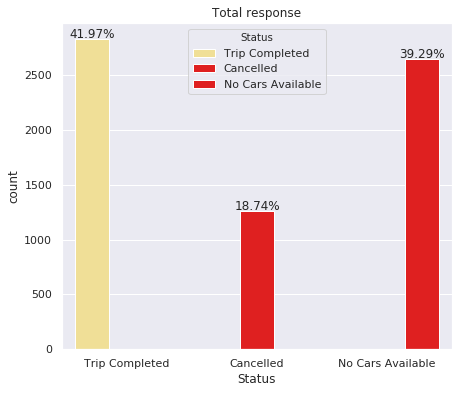

In [0]:
plt.figure(figsize=(7,6))
plt.title('Total response')
plt.ylabel('Total number of request')
sns.set(style="darkgrid")
ax=sns.countplot(x='Status',data=df,hue='Status',palette={"Cancelled":"Red" , "No Cars Available": "Red","Trip Completed":"#FFE888"})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
show()

#### As we can see there are almost equivalent request from airport to city and vice cersa .<br>
#### But there is a huge gap in supply 58% .Only ~42% requests are  getting fulfilled and  rest are either cancelled or the cars are not available.

### Overall demand based on Date and time

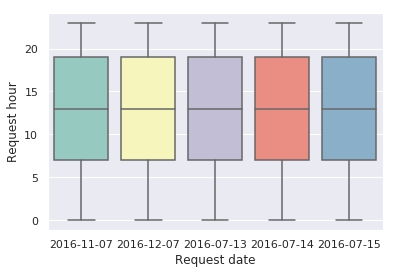

In [0]:
sns.boxplot(x="Request date", y="Request hour", data=df,palette="Set3")

#### As we can see there is no effect of date ,Demand remains the same irrespective of Request date.

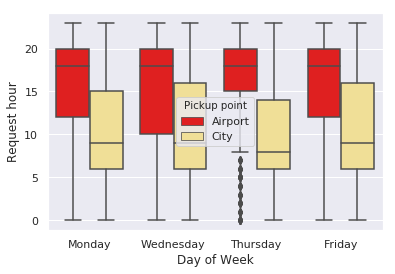

In [0]:
sns.boxplot(x="Day of Week", y="Request hour",hue='Pickup point',palette={"City": "#FFE888", "Airport": "Red"}, data=df)

#### As we can see there is no effect of *Weekday* ,demand remains the same

### Demand pattern in a day

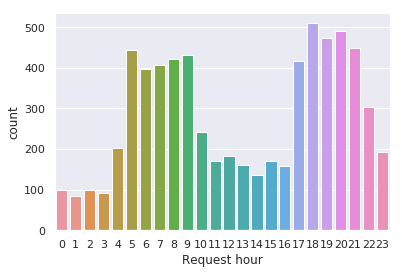

In [0]:
sns.countplot(x="Request hour", data=df)

#### As we can see *highest demand* is from 5am-9am early morning and from 5pm-9pm evening

### Request at different hour at city and airport

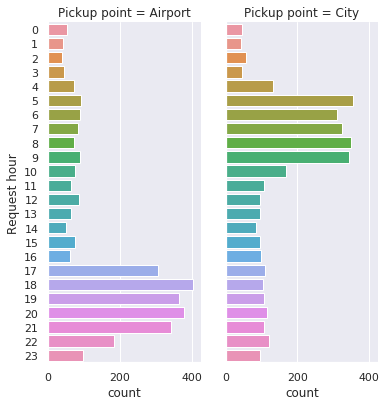

In [0]:

g=sns.catplot(y="Request hour", col="Pickup point", kind="count",height=4, aspect=.7,data=df)
g.fig.set_figheight(10)
g.fig.set_figheight(6)

#### There is a high demand of cabs from city in early morning hours.
#### There is a high demand of cabs from airport in the late evening and night hours i.e. from 5pm to 9pm


#### This means there are chances of  having:





  * >  more flights in early morning ,hence more customer going to airport from city.

* > more flights in late evening and night ,hence more customer going to city from airport.





#### Supply based on time and location

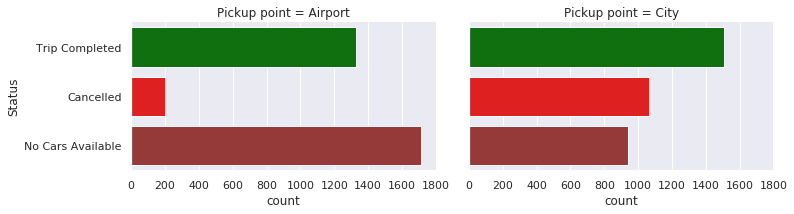

In [0]:
sns.set(style="darkgrid")
g=sns.catplot(y="Status", col="Pickup point",data=df,palette={"Trip Completed": "Green", "Cancelled": "Red","No Cars Available":"Brown"},height=8, aspect=.7, kind="count")
g.fig.set_figheight(2.8)
g.fig.set_figheight(2.3)



**From airport a large number of user faces can non-availability<br>
From city user face:**

*   cab denying service 
*   Non-availability



### Supply based on time


**Sessions are divided according to hours:**


*   0-3:*Late Night*
*   3-6:*Early Morning*
*   6-12:*'Morning*
*   12-16:*'Afternoon*
*   16-21:*Evening*
*    21-0:*Night*



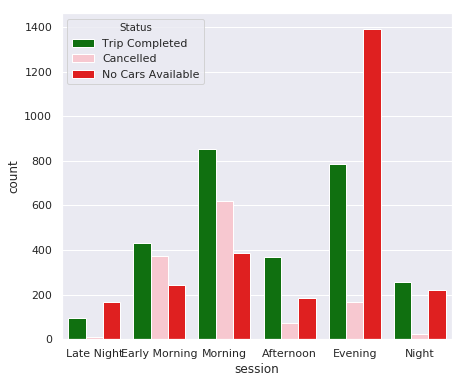

In [0]:
plt.figure(figsize=(7,6))
sns.countplot(x="session", hue="Status",palette={"Trip Completed": "Green", "Cancelled": "Pink","No Cars Available":"Red"} ,data=df)

### Demand supply gap

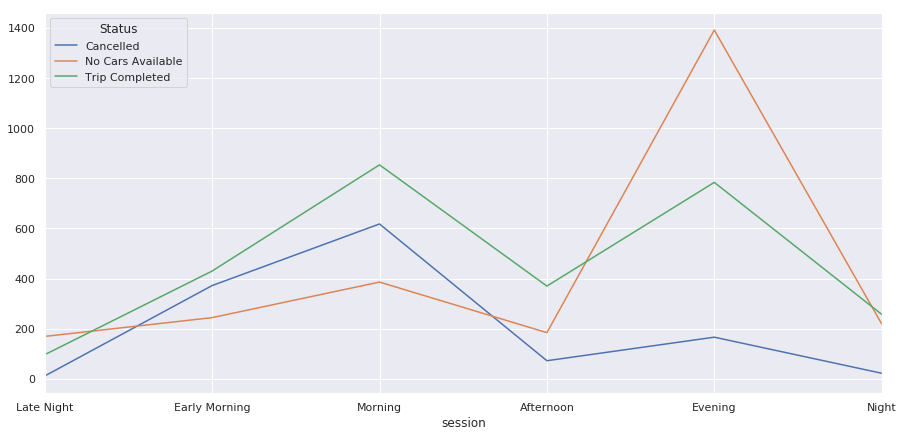

In [0]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['session','Status']).count()['Pickup point'].unstack().plot(ax=ax)


## Reason for Supply-Demand gap
• It was found the demand at peak times is mostly unidirectional and demand at destination around that was not enough for return trips for
  drivers.<br>
      ✓ It is recommended to provide incentives to drivers for trips to and from Airport during these rush hours (i.e. 5am to 11am and 5pm to 11pm).<br>
      ✓ During these rush hours customers can be charged higher for trips to and from Airport.
### Airport Pickup Supply-Demand gap<br>
▪ Inflow of Uber cabs to the airport is less during late mornings and Mid day which results in lesser available
  cabs from airport for evening drops.<br>
▪ Driver needs to be idle for longer time to get booking back to city.


### City Pickup Supply-Demand gap<br>
▪ Chances of getting pickup is way more than that from Airport.<br>
▪ Driver may get multiple chance of requests within city runs to complete his daily target, which might be the
  reason for cancellation for airport travels.<br>
▪ For most drivers end of day would be late evening



## Recommendations
▪ Car pool service can be introduced to serve the multiple requests in rush hours<br>
▪ Provide incentives for airport trips during peak time<br>
▪ Impose penalty for cancellation of requests by Driver and set threshold for maximum number of
  cancellations per day<br>
▪ Provide base price for drivers idle time or to comeback to city with empty passengers.<br>
▪ Cab pre book options can be initiated thus benefiting both customers and drivers as drivers would be
  sure of getting pickup from airport.<br>
▪ Promote to and from airport rides with more incentives for continuous 3-4 trips.